<a href="https://colab.research.google.com/github/sadrasa97/ml/blob/main/coppper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import normalize
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [39]:
data=pd.read_excel("/content/copper.xlsx")

In [40]:
data2=pd.read_excel("/content/Dental.xlsx")

In [41]:
data.head()

,Fluence(j/cm2),threshold fluence(j/cm2),wavelength(nm),optical penetration depth(nm),pulse duration(fs),reflectivity,seperation time(ps),Ablation rate(nm),Simulation result,Doi
0,1.82,1.3,800,46.8,1000,0.96,0,26,NaN,10.1016/j.apsusc.2020.147775
1,1.70,1.3,800,46.8,1000,0.96,0,10,NaN,10.1016/j.apsusc.2020.147775
2,2.73,1.3,800,46.8,1000,0.96,0,20,NaN,10.1016/j.apsusc.2020.147775
3,2.73,1.3,800,46.8,1000,0.96,0,25,NaN,10.1016/j.apsusc.2020.147775
4,4.68,1.3,800,46.8,1000,0.96,0,50,NaN,10.1016/j.apsusc.2020.147775


In [42]:
data.drop(['Doi'],inplace=True,axis=1)
data.drop(['Simulation result'],inplace=True,axis=1)
data.drop(['seperation time(ps)'],inplace=True,axis=1)
#data=data.drop('Doi',axis=True)

In [43]:
#data=data.replace({'e':0,'d':1})

In [44]:
data.head()

,Fluence(j/cm2),threshold fluence(j/cm2),wavelength(nm),optical penetration depth(nm),pulse duration(fs),reflectivity,Ablation rate(nm)
0,1.82,1.3,800,46.8,1000,0.96,26
1,1.70,1.3,800,46.8,1000,0.96,10
2,2.73,1.3,800,46.8,1000,0.96,20
3,2.73,1.3,800,46.8,1000,0.96,25
4,4.68,1.3,800,46.8,1000,0.96,50


In [45]:
#data = data.sample(frac = 1)

In [46]:
#data.to_excel("dentalout.xlsx")

In [47]:
#data.head()

In [48]:
#data=data[data.Tissues>0]

In [49]:
y=data['Ablation rate(nm)']

In [50]:
data.head()

,Fluence(j/cm2),threshold fluence(j/cm2),wavelength(nm),optical penetration depth(nm),pulse duration(fs),reflectivity,Ablation rate(nm)
0,1.82,1.3,800,46.8,1000,0.96,26
1,1.70,1.3,800,46.8,1000,0.96,10
2,2.73,1.3,800,46.8,1000,0.96,20
3,2.73,1.3,800,46.8,1000,0.96,25
4,4.68,1.3,800,46.8,1000,0.96,50


In [51]:
x=data.iloc[:,0:6]

In [52]:
x.head()

,Fluence(j/cm2),threshold fluence(j/cm2),wavelength(nm),optical penetration depth(nm),pulse duration(fs),reflectivity
0,1.82,1.3,800,46.8,1000,0.96
1,1.70,1.3,800,46.8,1000,0.96
2,2.73,1.3,800,46.8,1000,0.96
3,2.73,1.3,800,46.8,1000,0.96
4,4.68,1.3,800,46.8,1000,0.96


In [53]:
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
y = lab_enc.fit_transform(y)

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
x = scaler.fit_transform(x)

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

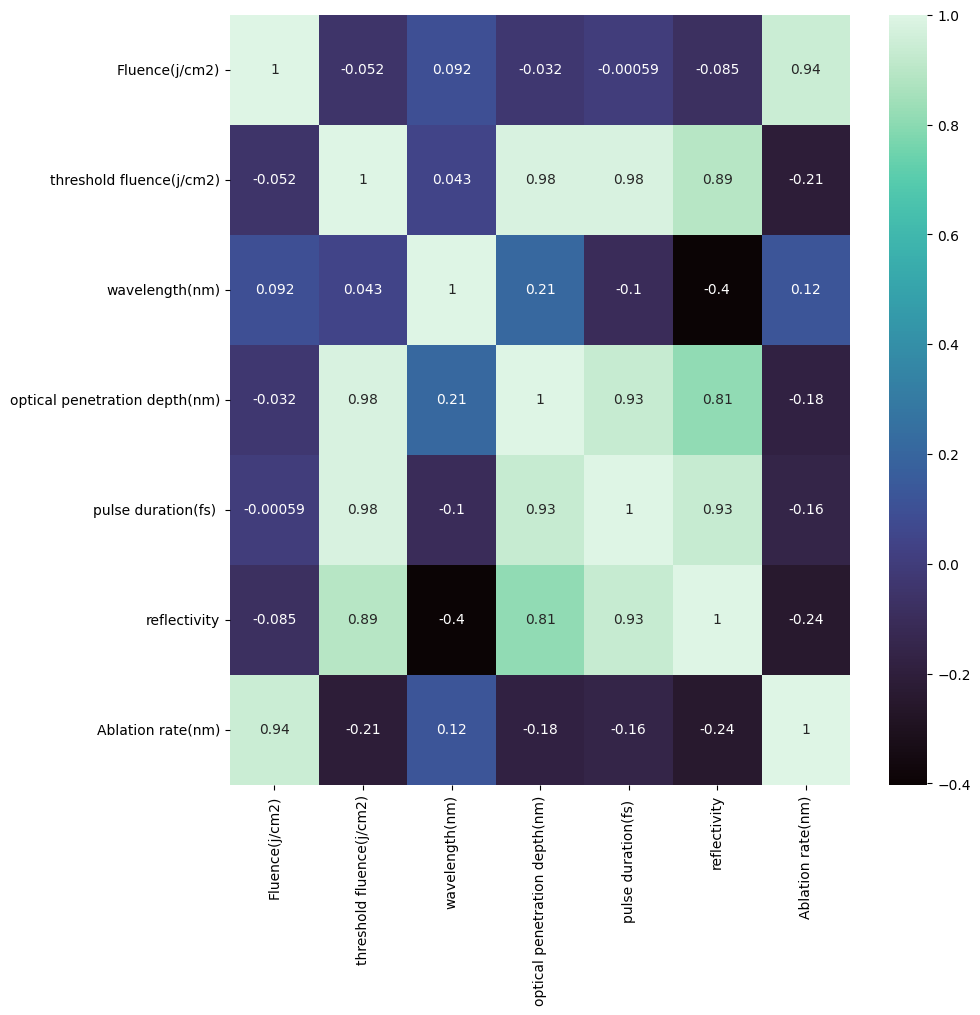

In [56]:
f,ax = plt.subplots(figsize=(10, 10))
cor = data.corr() #Calculate the correlation of the above variables
sns.heatmap(cor,annot=True ,cmap="mako") 
plt.show()

In [57]:
method_names=[] 
method_scores=[]

In [58]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()#
log_reg.fit(x_train, y_train) #Fitting
print("Logistic Regression Classification Test Accuracy {}".format(log_reg.score(x_test,y_test)))
method_names.append("Logistic Reg.")
method_scores.append(log_reg.score(x_test,y_test))
y_pred = log_reg.predict(x_test)

Logistic Regression Classification Test Accuracy 0.2953020134228188


In [59]:
from sklearn.svm import SVC
svm = SVC(random_state=42)
svm.fit(x_train,y_train)
print("SVM Classification Score is: {}".format(svm.score(x_test,y_test)))
method_names.append("SVM")
method_scores.append(svm.score(x_test,y_test))
y_pred = svm.predict(x_test)
print(svm.score(x_train,y_train))

SVM Classification Score is: 0.40939597315436244
0.38823529411764707


In [60]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
print("linear reg: {}".format(model.score(x_test,y_test)))
method_names.append("Linear regression")
method_scores.append(model.score(x_test,y_test))
y_pred = model.predict(x_test)

linear reg: 0.8457186545372388


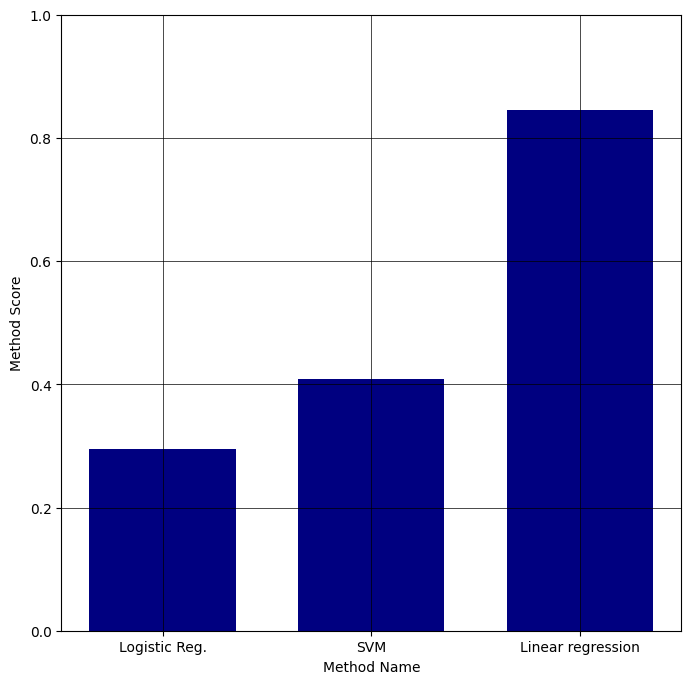

In [61]:
plt.figure(figsize=(8,8))
plt.ylim([0,1])
plt.bar(method_names,method_scores,width=0.7,color='navy')
plt.xlabel('Method Name')
plt.ylabel('Method Score')
plt.grid(color = 'black', linestyle = '-', linewidth = 0.5)
plt.show()

In [62]:
#ANN
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model=Sequential()
model.add(Dense(1024,activation='relu',input_dim=x_train.shape[1]))
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(optimizer='adam',loss='mean_squared_error')
history=model.fit(x_train,y_train,epochs=120,validation_split=0.2)

Epoch 1/120
15/15 [==============================] - 2s 50ms/step - loss: 119.6534 - val_loss: 34.5920
Epoch 2/120
15/15 [==============================] - 1s 42ms/step - loss: 14.0168 - val_loss: 7.4471
Epoch 3/120
15/15 [==============================] - 1s 64ms/step - loss: 6.6404 - val_loss: 5.8922
Epoch 4/120
15/15 [==============================] - 1s 63ms/step - loss: 5.6383 - val_loss: 3.8008
Epoch 5/120
15/15 [==============================] - 1s 66ms/step - loss: 4.7491 - val_loss: 3.5135
Epoch 6/120
15/15 [==============================] - 1s 41ms/step - loss: 4.3528 - val_loss: 2.7489
Epoch 7/120
15/15 [==============================] - 1s 41ms/step - loss: 3.5862 - val_loss: 2.7278
Epoch 8/120
15/15 [==============================] - 1s 41ms/step - loss: 2.3609 - val_loss: 1.8137
Epoch 9/120
15/15 [==============================] - 1s 40ms/step - loss: 1.9218 - val_loss: 1.7898
Epoch 10/120
15/15 [==============================] - 1s 42ms/step - loss: 1.6255 - val_loss: 1.

Text(0, 0.5, 'Loss')

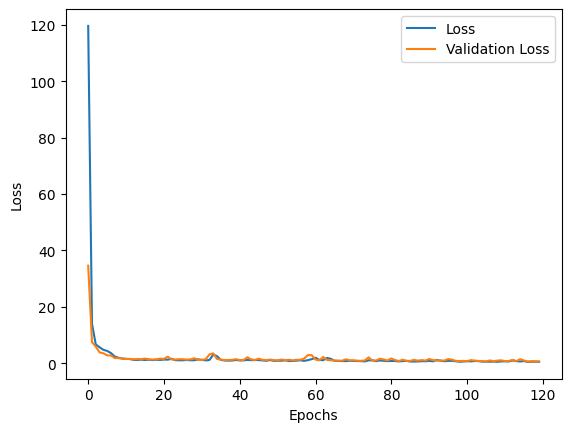

In [63]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

5/5 [==============================] - 0s 7ms/step


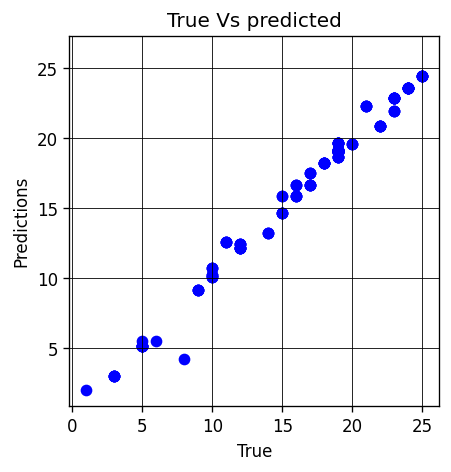

In [64]:
def plot_diff(y_true, y_pred, title=''):
    plt.figure(figsize=(4,4),dpi=120)
    plt.scatter(y_true, y_pred,color='blue')
    plt.title(title)
    plt.xlabel('True')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    #plt.plot([-10, 40], [-10, 40],color='red')
    plt.grid(color = 'black', linestyle = '-', linewidth = 0.5)
    plt.show()
y_pred = model.predict(x_test)
plot_diff(y_test, y_pred, title='True Vs predicted')

In [65]:
#X_random_sample = np.array([[1, 55, 65000, 11600, 562341]])
#y_predict = model.predict(X_random_sample)

In [66]:
data2.drop(['Doi'],inplace=True,axis=1)
#data=data.drop('Doi',axis=True)

In [67]:
data2=data2.replace({'e':0,'d':1})

In [68]:
y=data2['Depth per pulse(micrometer/pulse)']

In [69]:
x=data2.iloc[:,0:6]

In [70]:
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
y = lab_enc.fit_transform(y)

In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
x = scaler.fit_transform(x)

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [73]:
method_names=[] 
method_scores=[]

In [74]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train) #Fitting
print("Logistic Regression Classification Test Accuracy {}".format(log_reg.score(x_test,y_test)))
#method_names.append("Logistic regression")
#method_scores.append(model.score(x_test,y_test))
y_pred = log_reg.predict(x_test)

Logistic Regression Classification Test Accuracy 0.460431654676259


In [75]:
from sklearn.svm import SVC
svm = SVC(random_state=42)
svm.fit(x_train,y_train)
print("SVM Classification Score is: {}".format(svm.score(x_test,y_test)))
#method_names.append("SVM")
#method_scores.append(model.score(x_test,y_test))
#Confusion Matrix
#y_pred = svm.predict(x_test)

SVM Classification Score is: 0.6258992805755396


In [76]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
print("linear reg: {}".format(model.score(x_test,y_test)))
#method_names.append("Linear regression")
#method_scores.append(model.score(x_test,y_test))
#y_pred = model.predict(x_test)

linear reg: 0.6365758889263226


In [77]:
#plt.figure(figsize=(4,4))
#plt.ylim([0,1])
#plt.bar(method_names,method_scores,width=0.7,color='navy')
#plt.xlabel('Method')
#plt.ylabel('Accuracy')
#plt.grid(color = 'black', linestyle = '-', linewidth = 0.5)
#plt.show()

In [78]:
#ANN
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model=Sequential()
model.add(Dense(1024,activation='relu',input_dim=x_train.shape[1]))
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='linear'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 1024)              7168      
                                                                 
 dense_15 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_16 (Dense)            (None, 512)               524800    
                                                                 
 dense_17 (Dense)            (None, 512)               262656    
                                                                 
 dense_18 (Dense)            (None, 512)               262656    
                                                                 
 dense_19 (Dense)            (None, 256)               131328    
                                                                 
 dense_20 (Dense)            (None, 1)                

In [79]:
model.compile(optimizer='adam',loss='mean_squared_error')
history=model.fit(x_train,y_train,epochs=120,validation_split=0.2)

Epoch 1/120
14/14 [==============================] - 2s 50ms/step - loss: 231.3037 - val_loss: 80.7570
Epoch 2/120
14/14 [==============================] - 1s 43ms/step - loss: 82.5170 - val_loss: 73.3314
Epoch 3/120
14/14 [==============================] - 1s 41ms/step - loss: 56.6578 - val_loss: 51.6771
Epoch 4/120
14/14 [==============================] - 1s 42ms/step - loss: 48.9997 - val_loss: 43.2133
Epoch 5/120
14/14 [==============================] - 1s 41ms/step - loss: 42.1396 - val_loss: 35.0740
Epoch 6/120
14/14 [==============================] - 1s 41ms/step - loss: 37.5850 - val_loss: 27.0305
Epoch 7/120
14/14 [==============================] - 1s 41ms/step - loss: 25.5903 - val_loss: 23.5865
Epoch 8/120
14/14 [==============================] - 1s 39ms/step - loss: 17.9217 - val_loss: 11.9748
Epoch 9/120
14/14 [==============================] - 1s 40ms/step - loss: 15.0002 - val_loss: 12.9590
Epoch 10/120
14/14 [==============================] - 1s 39ms/step - loss: 11.780

Text(0, 0.5, 'Loss')

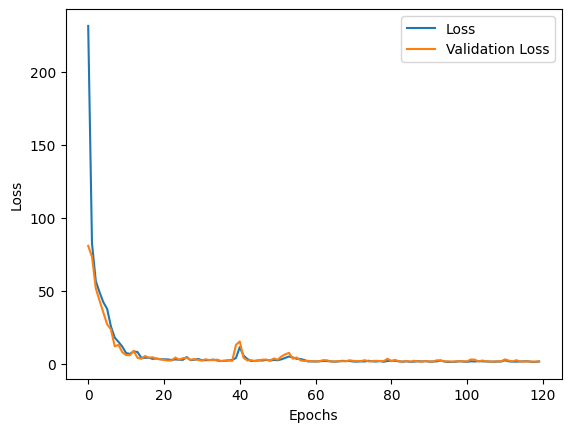

In [80]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

5/5 [==============================] - 0s 6ms/step


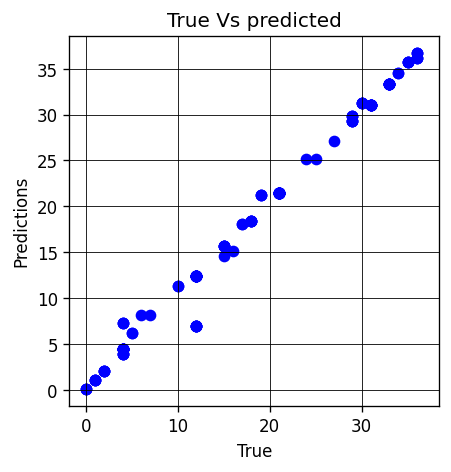

In [81]:
def plot_diff(y_true, y_pred, title=''):
    plt.figure(figsize=(4,4),dpi=120)
    plt.scatter(y_true, y_pred,color='blue')
    plt.title(title)
    plt.xlabel('True')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    #plt.plot([-10, 40], [-10, 40],color='red')
    plt.grid(color = 'black', linestyle = '-', linewidth = 0.5)
    plt.show()
y_pred = model.predict(x_test)
plot_diff(y_test, y_pred, title='True Vs predicted')